We will consider the credit card fraud dataset from Kaggle for understanding Logistic Regression

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
df = pd.read_csv("creditcard.csv")

In [74]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [75]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [76]:
print(df.shape)

(284807, 31)


In [77]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [78]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [79]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [80]:
dd1 = df['Class'].value_counts()
print(type(dd1))
print(dd1)

<class 'pandas.core.series.Series'>
Class
0    284315
1       492
Name: count, dtype: int64


In [81]:
no_fraud = df['Class'].value_counts()[0]
fraud = df['Class'].value_counts()[1]

print(type(no_fraud))
print(type(fraud))

print(no_fraud)
print(fraud)

per_no_fraud = round(no_fraud/len(df)*100, 2)
per_fraud = round(fraud/len(df)*100, 2)

print(per_no_fraud)
print(per_fraud)

<class 'numpy.int64'>
<class 'numpy.int64'>
284315
492
99.83
0.17


In [82]:
# Let's plot the classes

sns.countplot(x='Class', data=df)

<Axes: xlabel='Class', ylabel='count'>

### We will create a subsample that has balanced data

In [84]:


# We will create a subsample that has balanced data
df = df.sample(frac=1) 
#print("printing a few rows after shuffling:")

 
# creating a dataframe with all fraudulent data
fraud_data = df.loc[df["Class"]==1] # is a dataframe
print(fraud_data.shape)

# determining the shape of fraud dataframe and using the numbe rof rows information
n_samples = fraud_data.shape[0]

# creating a dataframe with all non-fraudulent data, same size as the fraud dataframe
non_fraud_data = df.loc[df["Class"]==0][:n_samples] # is a dataframe
print(non_fraud_data.shape)


# combining fraud and non-fraud dataframes
new_concat = pd.concat([fraud_data, non_fraud_data]) # concat will stack one over the other

print(new_concat)

# shuffle the rows in the dataframe so thatwe mix the non-fraud and fraud rows properly
new_df = new_concat.sample(frac=1, random_state=42)

new_df.head()

(492, 31)
(492, 31)
            Time         V1         V2         V3        V4        V5  \
6329      7519.0   1.234235   3.019740  -4.304597  4.732795  3.624201   
154697  102625.0  -4.221221   2.871121  -5.888716  6.890952 -3.404894   
63421    50706.0  -8.461845   6.866198 -11.838269  4.194211 -6.923097   
6609      8090.0  -1.783229   3.402794  -3.822742  2.625368 -1.976415   
102444   68207.0 -13.192671  12.785971  -9.906650  3.320337 -4.801176   
...          ...        ...        ...        ...       ...       ...   
62533    50307.0   1.309794  -0.407357   0.204061 -0.647852 -0.897628   
14656    25875.0   1.183597  -0.195647   0.931452  0.553460 -0.568622   
161191  113965.0   0.025593   0.816635   0.263077 -0.588995  0.442850   
188772  128118.0   1.949729  -0.724009  -1.732179 -0.786074  1.731702   
232548  147213.0  -0.821136   1.702277  -1.276818 -1.355944  1.218301   

              V6         V7         V8        V9  ...        V21       V22  \
6329   -1.357746   1.7134

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92406,63919.0,1.028584,-0.483495,0.760846,0.221735,-0.918645,-0.038669,-0.616971,0.319868,0.556349,...,-0.003934,-0.263242,0.089515,-0.006966,-0.090329,0.459598,-0.038396,0.015175,69.99,0
57615,47982.0,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,-1.973535,...,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,0.76,1
12216,21349.0,1.398886,-1.128319,1.526454,-0.962673,-2.318467,-0.858512,-1.603667,-0.149149,-0.115085,...,-0.160955,0.137995,0.113562,0.850615,0.077316,-0.223602,0.041010,0.038125,33.50,0
152223,97121.0,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,...,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,8.64,1
31002,36170.0,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1


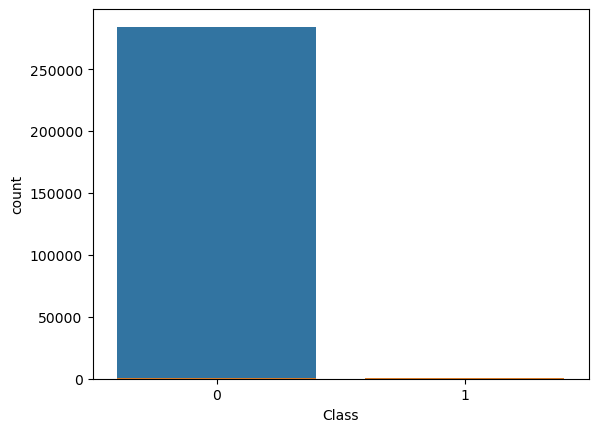

In [85]:
sns.countplot(x="Class", data=new_df)
plt.show()

In [86]:
# Let's plot distribution of Amount and Time columns separately

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = new_df['Amount'].values
time_val = new_df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', bins=50)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
print("++++++++")
print([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
print("after sns")

++++++++
[0.0, 2248.25]
after sns


In [87]:
# x will contain all columns except the target column which is "Class" and "Time"
x = new_df.drop(['Class', 'Time'], axis=1)
y = new_df['Class']

#import random

#all_columns = x.columns.tolist()
#selected_columns = random.sample(all_columns, 14)
#x = x[selected_columns]
#print(selected_columns)

x = x.sample(n=14, axis='columns')


In [88]:
#print(x.shape)

print(new_df.shape)

(984, 31)


In [89]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [90]:
# we are creating an instance of StandardScaler class and then performing a fit on x_train to obtain 
# mean and standard deviation for x-train
# then use it to transorm both x_train and x_test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train) # mean and standard deviation for x-train

train_sc = scaler.transform(x_train) 

test_sc = scaler.transform(x_test)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

In [93]:
import numpy as np

print(y_train.shape)
y_train = np.array(y_train).flatten()
print(y_train.shape)

(787,)
(787,)


In [94]:
model.fit(train_sc, y_train)

LogisticRegression(C=1)

In [95]:
print(test_sc.shape)

(197, 14)


In [96]:
ypred = model.predict(test_sc)

In [97]:
# to get coefficients and intercepts use the following command
print(model.coef_, model.intercept_)

[[ 0.23647736  0.18585106  0.48089973  0.09787565  0.29142774 -0.5126717
  -3.83463031 -0.00757987 -0.1662596  -0.11575091  0.17691608  0.97761176
  -0.10517227 -1.57896238]] [2.23734534]


In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[87,  0],
       [12, 98]])

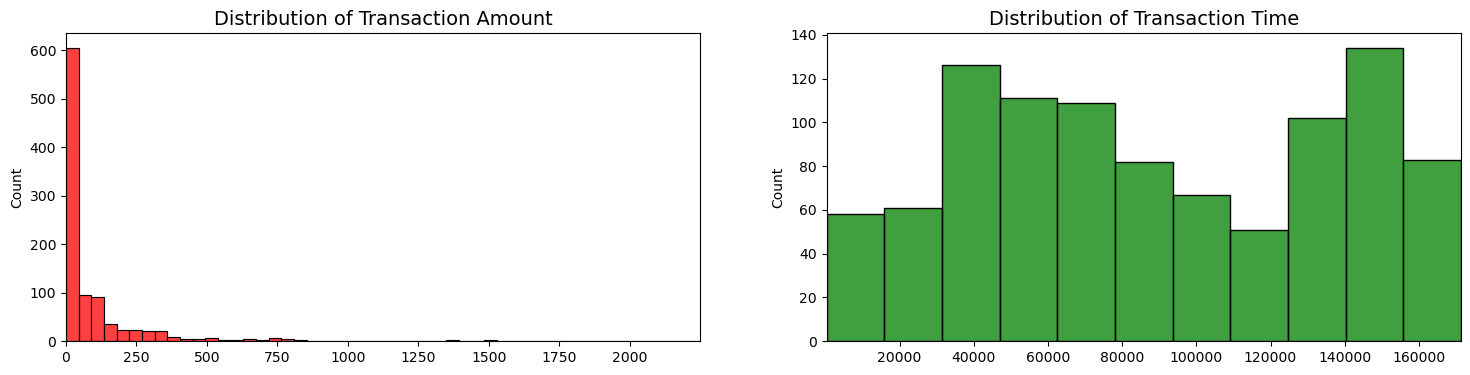

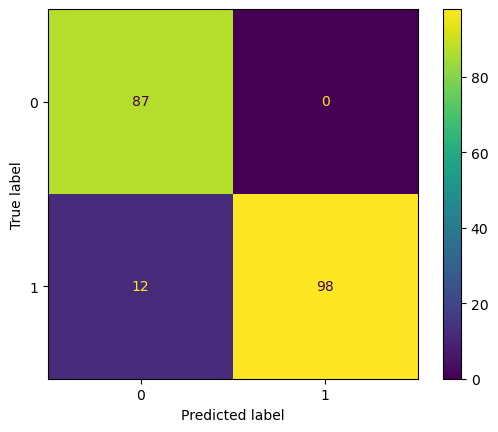

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, ypred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [100]:
from sklearn.metrics import accuracy_score
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))

Base rate accuracy is: 0.94


In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [102]:
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

Logistic AUC = 0.95
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        87
           1       1.00      0.89      0.94       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197



In [103]:
from sklearn.metrics import roc_curve
print(test_sc.shape)
print(y_test[0:5])
b = model.predict_proba(test_sc)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test, b)
#print(fpr)
#print(tpr)
#print(threshold)

(197, 14)
261056    1
189701    1
129818    0
10897     1
81609     1
Name: Class, dtype: int64
[0.97015481 0.99534559 0.10425263 1.         0.98510347]


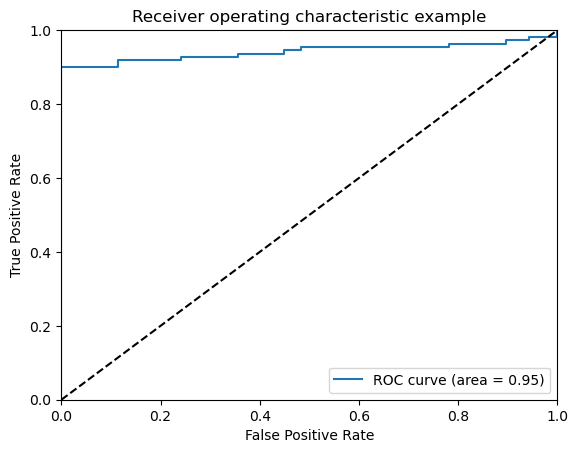

In [104]:
# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In-class activity 2:

Randonmly select 14 columns out of v1 to v28 columns, then consider 14 columns and amount and build a logistic regression model.

This notebook.